#  Machine Learning --*Scikit Learning*
## Model Validation
An important piece of machine learning is **model validation**: that is, determining how well your model will generalize from the training data to future unlabeled data.

### Overfitting / Underfitting
- 过拟合：高方差（variance）错误地把样本自身的一些特征作为所有样本的特征进行评估，导致模型泛化能力低。（泛化能力相当于模型的普适能力）
- 欠拟合：高偏差（bias）忽略训练样本中代表一般样本的特征，导致模型泛化能力低。

_有多种因素可能导致过拟合，其中最常见的情况是由于学习能力过于强大， 以至于把训练样本所包含的不太一般的特性都学到了，而欠拟合则通常是由 于学习能力低下而造成的欠拟合比较容易克服，例如在决策树学习中扩展分支、在神经网络学习中增加训练轮数等，而过拟合则很麻烦。在后面的学习中 我们将看到，过拟合是机器学习面临的关键障碍，各类学习算法都必然带有一 些针对过拟合的措施;然而必须认识到，过拟合是无法彻底避免的，我们所能做
的只是"缓解"或者说减小其风险. ————周志华《机器学习》_   
   ###### Solving Method

当算法不理想时，不外乎欠拟合或者过拟合问题，此时判断模型的拟合情况显得略微困难。为了解决这个问题，通常引入cross-validation（交叉检验）数据集。
<img src = 'bias_variance.png', width = 400, height = 200>
- 对于训练集，当 d 较小时，模型拟合程度更低，误差较大；随着 d 的增长，拟合程度提高，误差减小。 
- 对于交叉验证集，当 d 较小时，模型拟合程度低，误差较大；但是随着 d 的增长，误差呈现先减小后增大的趋势，转折点是我们的模型开始过拟合训练数据集的时候。（存在欠拟合到过拟合的转变）  
根据图，可以得到判断方法：

- ***训练集误差和交叉验证集误差近似时：偏差/欠拟合 ***
- ***交叉验证集误差远大于训练集误差时：方差/过拟合 ***

*针对高偏差和高方差问题，一般的解决方法列举如下：*
1. 获得更多的训练实例——解决高方差
2. 尝试减少特征的数量——解决高方差 
3. 尝试获得更多的特征——解决高偏差 
4. 尝试增加多项式特征——解决高偏差 
5. 尝试减少正则化程度 λ——解决高偏差
6. 尝试增加正则化程度 λ——解决高方差
<div align = right> _Andrew Ng Machine learning_

#### Validation Method
datasets is devided into three sectios randomly. *One is training datasets, the second is cross-validation datasets, the other is testing datasets.* Training datasets is applied to train a specific machine learning model(algorithm). Cross-validation datasets is used to calculate cross-validation errors between different models in order to choose better ones.  Testing datasets is used to calculate testing error to figure out the best model among chosen models.Usually the percentage is 60%, 20% , 20% specifically. Specially datasets sometimes is devided into two sections, training datasets and testing datasets. For examples, 70% of datasets are training datasets and the rest 30% are testing datasets.  
- 留出法(hold out)   
分层抽样的方法直接将数据集分成互斥的集合。
- 自助法   
给定包含m个样本的数据集 D，我们对它进行采样产生数据集 D': 每次随机从 D 中挑选一个将其拷贝放入 D', 然后再将该样本放回初始数据集 D 中，使得该样本在下次采样时仍有可能被采到;这个过程重复执行m 次后我们就得到了包含 m 个样本的数据集 D'，这就是自助采样的结果.显然，D 中有一部分样本会在 D' 中多次出现，而另一部分样本不出现.可以做一个简单的估计，样本在 m 次采
样中始终不被采到的概率是$$(1-1/m)^m$$取极限得到     
$$lim_(m>\inf)(1-1/m)^m = 1/e =0.368$$
- 交叉验证法  
** 该交叉验证法跟交叉验证集没有关系。**  
该方法将数据集划分为k个大小相似的互斥子集，每个子集尽可能保持数据分布的一致性，然后选择子集中k-1个子集作为训练集，剩下的那个子集作为测试集。k值很大程度上决定评估结果的稳定性和保真性。通常情况下，为了减小样本划分而引入的误差，k折交叉验证通常随机使用不同的划分方法重复p次，最终评估结果是这p次交叉验证的均值。称为“p次k折交叉验证”  
<img src = 'cross validation datasets.png', width =400, height = 200>

### Performance Measurement
*** Precision and Recall ***  
***针对二分类问题***  
先定义：TP, TN, FP, FN
<img src = 'confusion matrix.png', width = 300, height = 150>
再定义：准确率（precision）和查全率（recall）  
    P: 实际为正占所有预测为正的比例  
    R: 实际为正占所有测试样本中正例的比例  
$$P = TP/(TP + TN)$$
$$R = TP/(TP + FP)$$
最后定义：$F_1$ 度量 和$F_\beta$ 度量  
通常而言，P跟R是一对矛盾的度量，为了均衡度量模型对两者的表现，引入$F_1$ 度量 和$F_\beta$ 度量。 
$$1/F_1 = 0.5\times(1/P +1/R)$$
即$$F_1 = 2\times P \times R/(P + R)$$
一般形式：
$$1/F_1 = 1/(1 + \beta^2)\times(1/P +\beta^2/R)$$
$\beta$表示查全率对查准率的相对重要性，1 是退化为标准$F_1$, >1时查全率更重要，<1 查准率更重要

## HandWriting Recognition Example  

(1797, 64)
(1797, 56)
(1347, 64)
(450, 64)
(1347,)
(450,)
0.935555555556


[[42  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  0  1]
 [ 0  3 43  0  0  0  0  0  1  0]
 [ 0  0  1 44  0  1  0  0  1  1]
 [ 0  0  0  1 35  2  0  0  0  2]
 [ 0  0  0  0  1 50  0  0  0  1]
 [ 0  0  0  0  1  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  1  0 36  1]
 [ 0  0  0  1  0  2  0  0  2 34]]


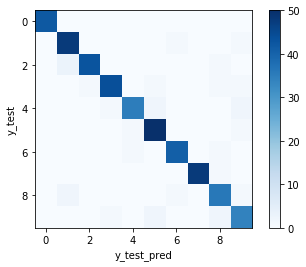



             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.91      0.96      0.93        50
          2       0.98      0.91      0.95        47
          3       0.96      0.92      0.94        48
          4       0.95      0.88      0.91        40
          5       0.91      0.96      0.93        52
          6       0.95      0.95      0.95        43
          7       1.00      0.98      0.99        49
          8       0.86      0.90      0.88        40
          9       0.85      0.87      0.86        39

avg / total       0.94      0.94      0.94       450





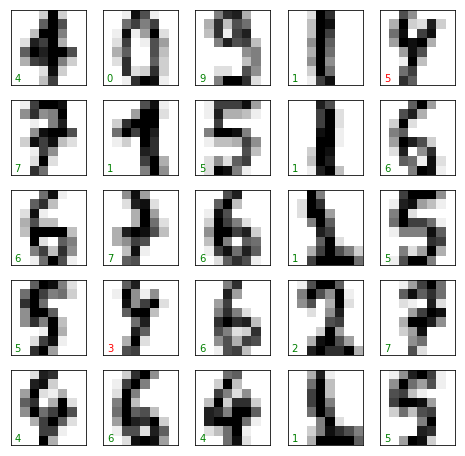

In [1]:
%matplotlib inline
#train_test_split 在低版本<0.18中存在cross_validation 模块中，在0.19和0.20中移到了model_selection 模块中
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import numpy as np

#import seaborn; seaborn.set()

digits = load_digits()
data, labels = digits['data'], digits['target']
print(data.shape)

#isomap降维可以提高准确率
iso = Isomap(n_components = 56)
data_projected = iso.fit_transform(digits['data'])
#data = data_projected
print(data_projected.shape)



#划分训练集和测试集
x_train, x_test,y_train, y_test = train_test_split(data, labels, random_state = 2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#选择模型训练和预测
##经过测试
###不降维使用SVC训练模型较好，优于降维的LogisticRegression
###降维使用LogisticRegression训练模型好
#model = RandomForestClassifier()
model = SVC(gamma =0.001)
#model = LogisticRegression(penalty='l2')
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)


#模型性能测量
#准确度
print(accuracy_score(y_test, y_test_pred))
print('\n')

#混淆矩阵：维度为 lalel数量 * label数量;行：实际；列，预测
##此处以最后一行为例解释：倒数第二列的2表示实际为9误判为8的有2个，倒数第一列的37表示实际为9并且预测为9的有37个
print(confusion_matrix(y_test, y_test_pred))
#图形化混淆矩阵
fig_1 = plt.figure(1)
plt.imshow(confusion_matrix(y_test, y_test_pred), cmap = 'Blues', interpolation = 'nearest')
plt.colorbar()
plt.ylabel('y_test')
plt.xlabel('y_test_pred')
plt.show()
print('\n')

#查准率、查全率、F度量(函数返回值类型为str)
print(classification_report(y_test, y_test_pred))
print('\n')


##图形化训练集和测试集
def visual_digits(xtest, ytest, ytestpred, rows = 5, colums =5):
    fig, axe = plt.subplots(rows, colums, figsize = (8, 8)) 
    for index, ax in enumerate(axe.flat):
        ax.imshow(xtest[index].reshape(8,8), cmap = plt.cm.gray_r)
        ax.text(0.05, 0.05, str(ytestpred[index]), transform=ax.transAxes, color='green' if (ytest[index] == ytestpred[index]) else 'red')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.grid(False)
    plt.show()

visual_digits(x_test, y_test, y_test_pred)
    